In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
%matplotlib inline

# Funções

In [2]:
#plota grades do dom 2 e 3 
def plot_t2(imagem, d):                       # d = 2 dominio 3 , 3 dominio 3
    plt.figure(figsize=(14,12))
    plt.imshow(imagem,cmap='jet',)
    if d == 2:
        plt.xticks(np.linspace(0,14,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),fontsize = 16)
        plt.yticks(np.linspace(0,12,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 16)
    if d == 3:
        plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),fontsize = 16)
        plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 16)

    #plt.colorbar(shrink=0.8).set_label(label='Temperatura K',size=15,weight='bold')

    b = plt.colorbar(shrink=0.8)
    b.set_label(label='Temperatura K',size=15,weight='bold')

    for l in b.ax.yaxis.get_ticklabels():
        l.set_family("Times New Roman")
        l.set_size(14)

        
# cria a grade                                 # d = idem func anterior 
def opengrad(arquiv, d=3):
    grid = np.loadtxt(arquiv)
    if d == 2: 
        imagem = grid.reshape(13,15)   # dim 15 x 13
    if d == 3:
        imagem = grid.reshape(61,71)   # 61 x 71
    imagem = np.rot90(imagem,2)
    imagem = np.flip(imagem,1)
    return imagem
 

# redimensiona dominio de array a para d subdivisoes da celula
def dimen(a,d):     
    l = len(a[0])*d
    ar = np.zeros(l)
    for i in range(len(a)):
        L = np.repeat(a[i],d)
        for x in range(d):
            ar = np.vstack((ar,L))#np.concatenate((ar,L))
    return ar[1:]

    

# Abrindo dados

In [3]:
grid = opengrad('../WRF/grades/d2_t2_28.csv',2)

#grid = grid.flatten()

In [4]:
# cria uma array a partir do path_d2.txt [% ls d2_t2_*.csv > path_d2.txt]

files_d2 = np.loadtxt('../WRF/grades/path_d2.txt', dtype='str')#glob.glob(path + 'd3_t2*.csv')
files_d3 = np.loadtxt('../WRF/grades/path_d3.txt', dtype='str')

In [5]:
#abre e cria as grades para todos os arquivos de files e coloca em uma array
files_d3

array(['d3_t2_28.csv', 'd3_t2_29.csv', 'd3_t2_30.csv', 'd3_t2_31.csv',
       'd3_t2_32.csv', 'd3_t2_33.csv', 'd3_t2_34.csv', 'd3_t2_35.csv',
       'd3_t2_36.csv', 'd3_t2_37.csv', 'd3_t2_38.csv', 'd3_t2_39.csv',
       'd3_t2_40.csv', 'd3_t2_41.csv', 'd3_t2_42.csv', 'd3_t2_43.csv',
       'd3_t2_44.csv', 'd3_t2_45.csv', 'd3_t2_46.csv', 'd3_t2_47.csv',
       'd3_t2_48.csv', 'd3_t2_49.csv', 'd3_t2_50.csv', 'd3_t2_51.csv',
       'd3_t2_52.csv'], dtype='<U12')

In [6]:
path = '../WRF/grades/'
dom2 = []
dom3 = []
for i in range(len(files_d2)):
    grid = opengrad(path+files_d2[i],2)
    grid1 = opengrad(path+files_d3[i],3)
    dom2.append(grid)
    dom3.append(grid1)
    
dom2 = np.array(dom2)
dom3 = np.array(dom3)

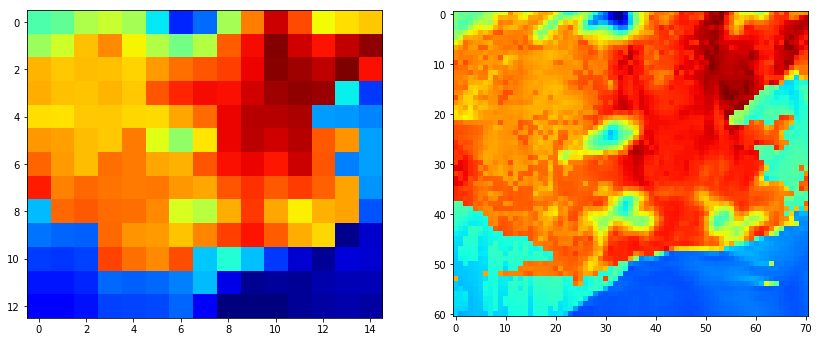

In [7]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(dom2[10]-273.15,cmap='jet')

plt.subplot(1,2,2)
plt.imshow(dom3[10], cmap='jet')

In [271]:
# dom2=np.array(dom2)
# plt.plot(dom2[:,10,10])
# plt.plot(dom3[:,10,10])

In [8]:
# retorna a coordenada dos pontos a partir de valores de latlon
def pontos(lat,lon, d=2):
    xc = abs(lon +43.798)#43.128)#
    yc = abs(lat + 22.5861)#23.1153)
    apLAT = 0.5292
    apLON = 0.67
    if d ==2:
        xi = int(xc/apLAT*15)
        yi = int(yc/apLON*13)
    if d ==3:
        yi = int((yc/apLAT)*71)
        xi = int((xc/apLON)*61)
    return (yi,xi)
        
    

In [9]:
#santa cruz   t 28 297.806
pontos(-22.90944,-43.68444,3)#,3)

(43, 10)

In [10]:
dom3[0,43,10] #37,12

298.24599999999998

In [11]:
#jardim botanico   t 28  299.719     (44,60)
pontos(-22.97278,-43.22389,3)

(51, 52)

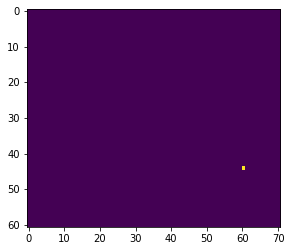

In [12]:
plt.imshow(dom3[0] == 299.719)

In [13]:
dom3[0,44,60]

299.719

# Uso do solo 1km 

In [9]:
uso_solo = opengrad('../WRF/grades/usodosolo.csv',3)

/home/rafael/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


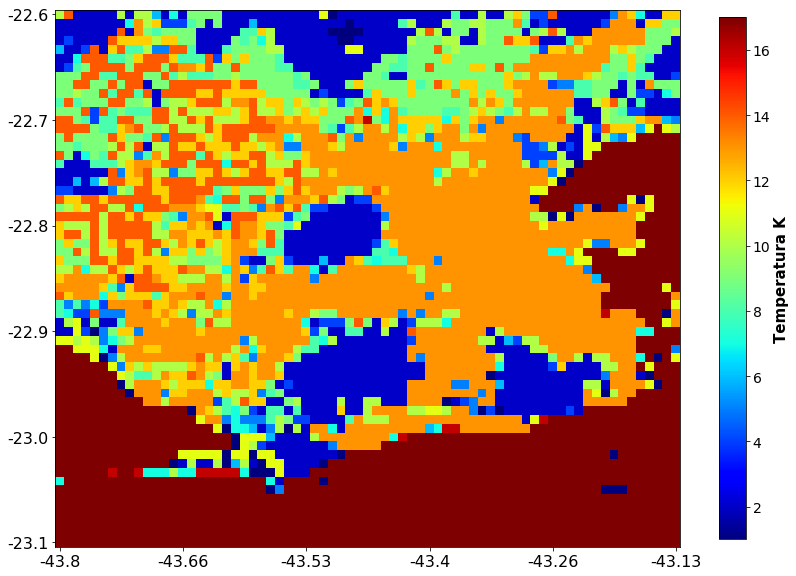

In [10]:
plot_t2(uso_solo,3)

In [11]:
# replicando para as 25 H
uso_solo_1km = []
for i in range(len(dom3)):
    gd = uso_solo[:60,:70]
    uso_solo_1km.append(gd)
    
uso_solo_1km = np.array(uso_solo_1km)

In [12]:
uso_solo_1km.shape

(25, 60, 70)

# MDE

In [13]:
import rasterio as rio
from matplotlib import colors

In [14]:
mde = rio.open('../MDE/srtm_90_1km.tif')

In [15]:
mde_1km = mde.read()[0]

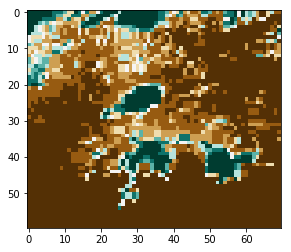

In [16]:
bounds=[1,20,40,60,80, 100, 150,200 ,300 , 580 ]
norm = colors.BoundaryNorm(bounds, ncolors=256)

plt.imshow(mde.read()[0],cmap='BrBG',norm=norm)

In [22]:
mde_1km.shape

(60, 70)

In [17]:
mde_f = []
for i in range(len(dom3)):
    gd = mde_1km
    mde_f.append(gd)
    
mde_f = np.array(mde_f)

In [18]:
mde_f.shape

(25, 60, 70)

In [84]:
# slope

slope = rio.open('../MDE/slope_red.tif')
slope = slope.read()[0]

In [85]:
slope.shape

(60, 70)

In [58]:
slope_f = []
for i in range(len(dom3)):
    gd = slope
    slope_f.append(gd)
    
slope_f = np.array(slope_f)

In [86]:
# aspect
aspect = rio.open('../MDE/aspecto_red.tif').read()[0]

In [52]:
aspect_f = []
for i in range(len(dom3)):
    gd = aspect
    aspect_f.append(gd)
aspect_f = np.array(aspect_f)

In [53]:
aspect_f.shape

(25, 60, 70)

## índices de vegetação

In [28]:
ndvi = rio.open('../IV/ndvi.tif')
evi = rio.open('../IV/evi.tif')

In [29]:
ndvi_1km = ndvi.read()[0]
evi_1km = evi.read()[0]

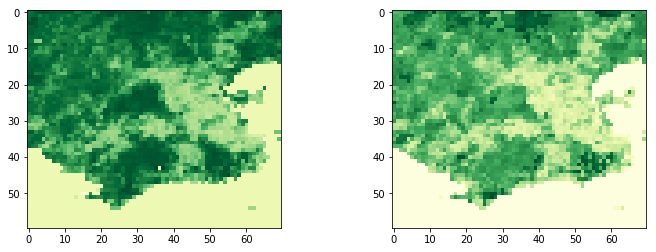

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(ndvi_1km, cmap='YlGn')

plt.subplot(1,2,2)
plt.imshow(evi_1km, cmap='YlGn')

In [31]:
evi_1km.shape

(60, 70)

In [32]:
ndvi_f = []
evi_f = []
for i in range(len(dom3)):
    gd = ndvi_1km
    gd1 = evi_1km
    ndvi_f.append(gd)
    evi_f.append(gd1)
    
ndvi_f = np.array(ndvi_f)
evi_f = np.array(evi_f)

In [33]:
ndvi_f.shape

(25, 60, 70)

In [43]:
evi_f.shape

(25, 60, 70)

# Criando Dataframe

## redimensionando dom2 5 km para 1km

In [35]:
dom2_1km = []
for i in range(len(dom2)):
    gd = dom2[i,:12,:14]
    gd = dimen(gd,5)
    dom2_1km.append(gd)
dom2_1km = np.array(dom2_1km)

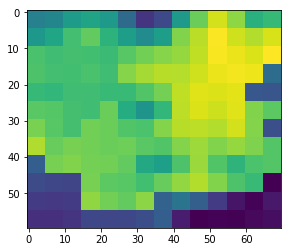

In [36]:
plt.imshow(dom2_1km[10])

In [38]:
y = dom2_1km.flatten()

In [39]:
y.shape

(105000,)

## dom3 de 61x71 para 60x70

In [40]:
dom3_6070 = []
for i in range(len(dom3)):
    gd = dom3[i,:60,:70]
    dom3_6070.append(gd)

dom3_6070 = np.array(dom3_6070)

In [57]:
slope_f.shape

(25, 55, 70)

## Reunindo os dados

In [77]:
df = pd.DataFrame({'t2_5km':dom2_1km.flatten(),'usodosolo':uso_solo_1km.flatten(),
                  'elevacao':mde_f.flatten(),'aspect':aspect_f.flatten(),
                   'slope':slope_f.flatten(),'ndvi':ndvi_f.flatten(), 
                   'evi':evi_f.flatten(),'t2_1km':dom3_6070.flatten()})

In [78]:
df.shape

(105000, 8)

In [79]:
df = df.dropna()

In [80]:
df['aspect_LE'] = df.aspect.apply(lambda x: np.cos(x))
df['aspect_NS'] = df.aspect.apply(lambda x: np.sin(x))

In [81]:
df.to_csv('../dados_meteorologicos/dataframe_ML_8unit.csv')

In [82]:
df.shape

(98600, 10)

# Zona de testes 

In [34]:
def dimen(a,d):     
    l = len(a[0])*d
    ar = np.zeros(l)
    for i in range(len(a)):
        L = np.repeat(a[i],d)
        for x in range(d):
            ar = np.vstack((ar,L))#np.concatenate((ar,L))
    return ar[1:]


In [35]:
dom2_1km = dimen(dom2[10,:12,:14],5)

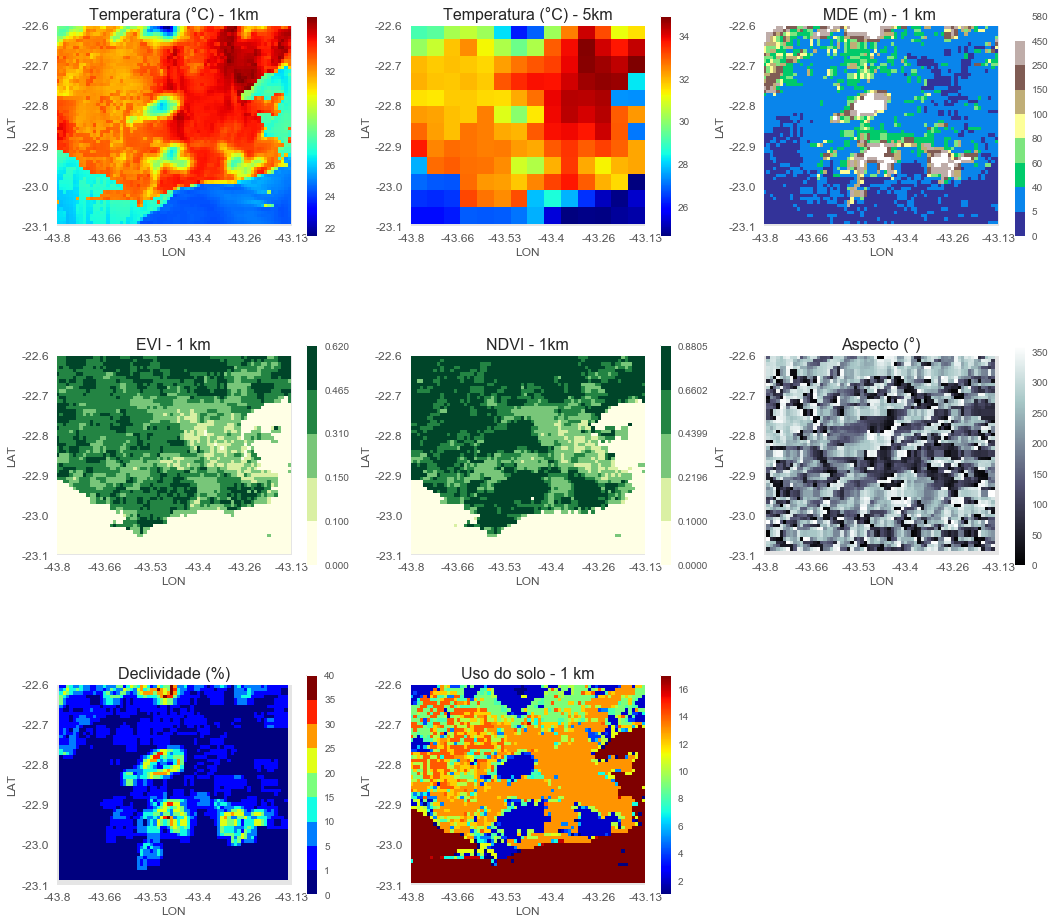

In [104]:
# plotando dados
plt.style.use('ggplot')
plt.figure(figsize=(16,16))

plt.subplot(3,3,1)
plt.title('Temperatura (°C) - 1km',fontsize=16)
plt.imshow(dom3[10,:60,:70]-273.15,cmap='jet',)
plt.grid(None)
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)


plt.subplot(3,3,2)
plt.title('Temperatura (°C) - 5km',fontsize=16)
plt.imshow(dom2_1km-273.15, cmap='jet')
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)


plt.subplot(3,3,3)
plt.title('MDE (m) - 1 km ',fontsize=16)
bounds=[0,5,40,60,80, 100, 150,250 ,450 , 580 ]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(mde.read()[0],cmap='terrain',norm=norm)
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)

plt.subplot(3,3,4)
plt.title('EVI - 1 km',fontsize=16)
bounds=[0,0.1,0.1500,0.3101,0.4650,0.6200]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(evi_1km/10000,norm=norm,cmap='YlGn')
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)

plt.subplot(3,3,5)
plt.title('NDVI - 1km',fontsize=16)
bounds=[0,0.1,0.2196,0.4399,0.6602,0.8805 ]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(ndvi_1km/10000,norm=norm, cmap='YlGn')
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)

plt.subplot(3,3,6)
plt.title('Aspecto (°)',fontsize=16)
#bounds=[0,0.1,0.2196,0.4399,0.6602,0.8805 ]
#norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(aspect,cmap='bone')
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)

plt.subplot(3,3,7)
plt.title('Declividade (%)',fontsize=16)
bounds=[0,1,5,10,15,20,25,30,35,40 ]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(slope, cmap='jet',norm=norm)
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)





plt.subplot(3,3,8)
plt.title('Uso do solo - 1 km',fontsize=16)
plt.imshow(uso_solo[:60,:70], cmap='jet')
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)

#plt.savefig('../graficos/variaveis_de_entrada_ggplot.png')


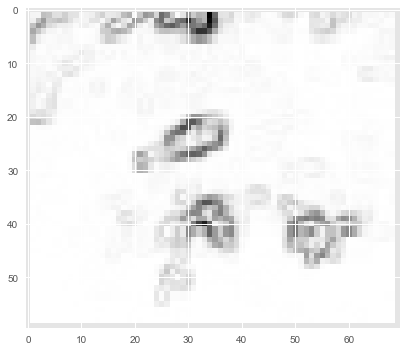

In [87]:
plt.imshow(slope)

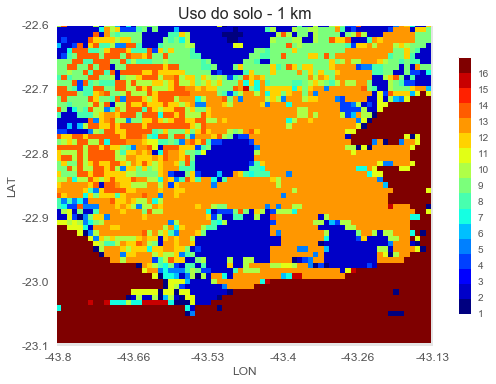

In [115]:
plt.title('Uso do solo - 1 km',fontsize=16)


categorias = ['Floresta perene acicufoliada', 'Floresta perene latifoliada',
             'Floresta decidual acicufoliada', 'Floresta decidual latifoliada',
             'Floresta Mista', 'Arbustos com sobreposição','Arbustos sem sobreposição',
             'Savana arborizada','Savanas', 'Pastagem', 'Terras alagadas',
              'Terras Agrícolas','Área Urbana','Vegetação Natural mosaicada', 'Gelo e neve',
             'Solo exposto', 'Água']

cmap = plt.get_cmap('jet',17)
mat = plt.imshow(uso_solo[:60,:70],cmap=cmap)
plt.colorbar(mat,ticks = range(17), shrink = 0.8)

plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)


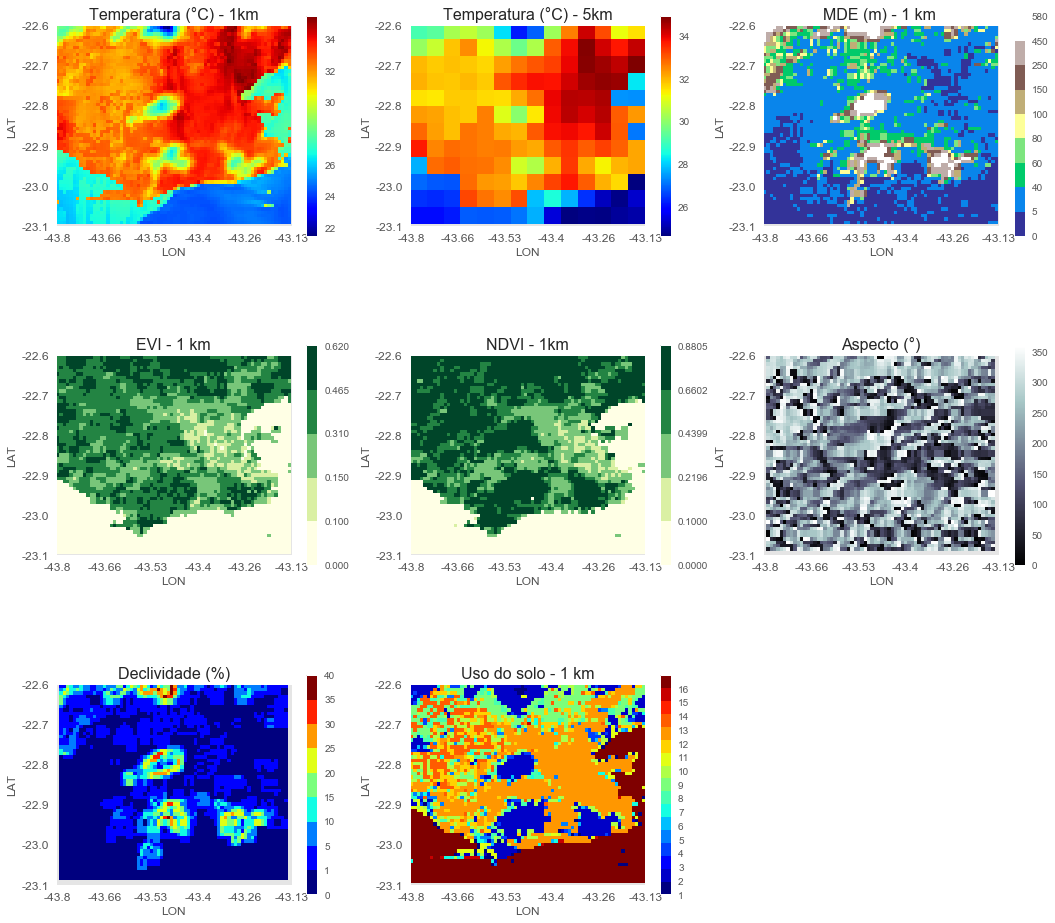

In [134]:
# plotando dados
plt.style.use('ggplot')
plt.figure(figsize=(16,16))

plt.subplot(3,3,1)
plt.title('Temperatura (°C) - 1km',fontsize=16)
plt.imshow(dom3[10,:60,:70]-273.15,cmap='jet',)
plt.grid(None)
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)


plt.subplot(3,3,2)
plt.title('Temperatura (°C) - 5km',fontsize=16)
plt.imshow(dom2_1km-273.15, cmap='jet')
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)


plt.subplot(3,3,3)
plt.title('MDE (m) - 1 km ',fontsize=16)
bounds=[0,5,40,60,80, 100, 150,250 ,450 , 580 ]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(mde.read()[0],cmap='terrain',norm=norm)
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)

plt.subplot(3,3,4)
plt.title('EVI - 1 km',fontsize=16)
bounds=[0,0.1,0.1500,0.3101,0.4650,0.6200]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(evi_1km/10000,norm=norm,cmap='YlGn')
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)

plt.subplot(3,3,5)
plt.title('NDVI - 1km',fontsize=16)
bounds=[0,0.1,0.2196,0.4399,0.6602,0.8805 ]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(ndvi_1km/10000,norm=norm, cmap='YlGn')
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)

plt.subplot(3,3,6)
plt.title('Aspecto (°)',fontsize=16)
#bounds=[0,0.1,0.2196,0.4399,0.6602,0.8805 ]
#norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(aspect,cmap='bone')
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)

plt.subplot(3,3,7)
plt.title('Declividade (%)',fontsize=16)
bounds=[0,1,5,10,15,20,25,30,35,40 ]
norm = colors.BoundaryNorm(bounds, ncolors=256)
plt.imshow(slope, cmap='jet',norm=norm)
plt.colorbar(shrink = 0.8)
plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)
plt.grid(None)





plt.subplot(3,3,8)
plt.title('Uso do solo - 1 km',fontsize=16)


cmap = plt.get_cmap('jet',17)
mat = plt.imshow(uso_solo[:60,:70],cmap=cmap)
plt.colorbar(mat,ticks = range(17), shrink = 0.8)

plt.xticks(np.linspace(0,70,6),(-43.80, -43.66, -43.53, -43.40, -43.26,-43.13),
           fontsize = 12)
plt.xlabel('LON')
plt.ylabel('LAT')
plt.yticks(np.linspace(0,60,6),(-22.6,-22.7,-22.8,-22.9, -23.0, -23.1), fontsize = 12)

plt.grid(None)


plt.savefig('../graficos/variaveis_de_entrada_ggplot.png')


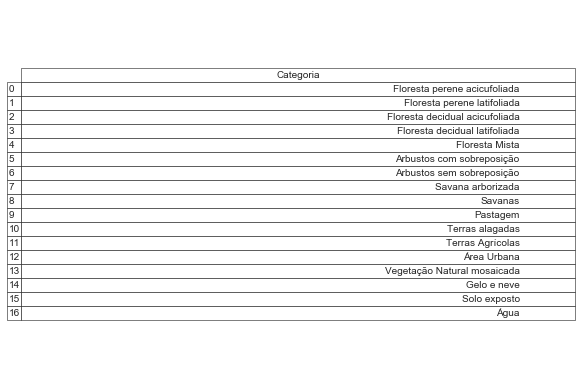

In [141]:
categorias = ['Floresta perene acicufoliada', 'Floresta perene latifoliada',
             'Floresta decidual acicufoliada', 'Floresta decidual latifoliada',
             'Floresta Mista', 'Arbustos com sobreposição','Arbustos sem sobreposição',
             'Savana arborizada','Savanas', 'Pastagem', 'Terras alagadas',
              'Terras Agrícolas','Área Urbana','Vegetação Natural mosaicada', 'Gelo e neve',
             'Solo exposto', 'Água']
categorias = np.array(categorias).reshape(17,1)
dataframe = pd.DataFrame(categorias)
fig, ax = plt.subplots()

# hide axes
fig.patch.set_visible(False)
plt.axis('off')
plt.axis('tight')

plt.table(cellText=dataframe.values,
          rowLabels=range(17),colLabels=['Categoria', 'Descrição'],
                      loc='center')

plt.tight_layout()

In [86]:
dom2_1km.shape

(60, 70)

In [46]:
dom3[10].

(61, 71)

In [47]:
dom2[10].shape

(13, 15)

In [131]:
mde_1km.shape

(60, 70)

In [132]:
dom2_1km.shape

(60, 70)

In [133]:
uso_solo.shape

(61, 71)

In [136]:
a 

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [139]:
a.flatten()

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [141]:
b = np.array([a,a])

In [146]:
dom3.shape

(25, 61, 71)

In [169]:
np.vstack((b,a))

ValueError: all the input arrays must have same number of dimensions

In [165]:
np.append(b,a)

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 2, 3, 4,
       5, 6, 7, 8, 9])

In [175]:
c = np.array([])
for i in range(len(b)):
    c=np.append(c,b)

In [172]:
b

array([[[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]],

       [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]])

In [182]:
c = np.append(c,b)

In [197]:
c = np.array([])

In [198]:
c =np.append(c,dom3)

In [199]:
c.shape

(108275,)

In [196]:
dom3.shape

(25, 61, 71)